In [1]:
import sys
import pandas as pd
import os
import seaborn as sns
cur=os.getcwd()
par=os.path.dirname(cur)
sys.path.insert(0,par)
from scripts.classes import FinancialAnalyzer

In [20]:
sentiment=pd.read_csv('C:/Users/abenet/Desktop/data/sentiment.csv')
analyzer=FinancialAnalyzer('AAPL','2020-01-01','2020-12-30')
data=analyzer.ticker_data()
sentiment

,Unnamed: 0,date,sentiment
0,0,2020-03-09,-0.302067
1,1,2020-03-10,-0.090787
2,2,2020-03-11,-0.023850
3,3,2020-03-12,-0.078360
4,4,2020-03-13,-0.059727
...,...,...,...
83,83,2020-06-10,0.381800
84,84,2020-06-10,0.000000
85,85,2020-06-10,0.202300
86,86,2020-06-10,0.000000


In [17]:
merged_data=sentiment.merge(data,left_on='date',right_on='Date')
merged_data['date']=pd.to_datetime(merged_data['date'])
merged_data=merged_data.drop(['Unnamed: 0','Date'],axis=1)
merged_data['pct_close']=merged_data['Close'].pct_change()
merged_data['pct_sentiment']=merged_data['sentiment'].pct_change()
merged_data.dropna(inplace=True)
merged_data

,date,sentiment,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,pct_close,pct_sentiment
1,2020-03-10,-0.090787,69.285004,71.610001,67.342499,71.334999,69.398438,285290000,0.0,0.0,0.072022,-0.699445
2,2020-03-11,-0.023850,69.347504,70.305000,67.964996,68.857498,66.988190,255598800,0.0,0.0,-0.034731,-0.737299
3,2020-03-12,-0.078360,63.985001,67.500000,62.000000,62.057499,60.372791,418474000,0.0,0.0,-0.098755,2.285535
4,2020-03-13,-0.059727,66.222504,69.980003,63.237499,69.492500,67.605965,370732000,0.0,0.0,0.119808,-0.237784
5,2020-03-16,0.044191,60.487499,64.769997,60.000000,60.552502,58.908657,322423600,0.0,0.0,-0.128647,-1.739878
...,...,...,...,...,...,...,...,...,...,...,...,...
64,2020-06-10,0.381800,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,0.000000,6.399225
65,2020-06-10,0.000000,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,0.000000,-1.000000
66,2020-06-10,0.202300,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,0.000000,inf
67,2020-06-10,0.000000,86.974998,88.692497,86.522499,88.209999,86.047615,166651600,0.0,0.0,0.000000,-1.000000


In [18]:
merged_data=analyzer.technical_indicators(merged_data)

<Axes: >

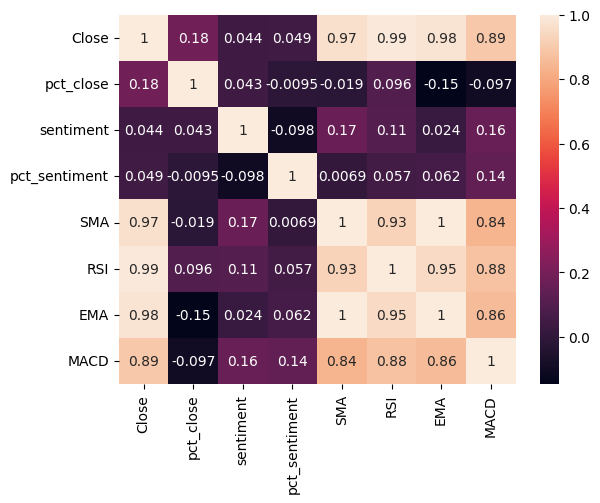

In [19]:
corr=merged_data[['Close','pct_close','sentiment','pct_sentiment','SMA','RSI','EMA','MACD']].corr()
sns.heatmap(corr,annot=True)

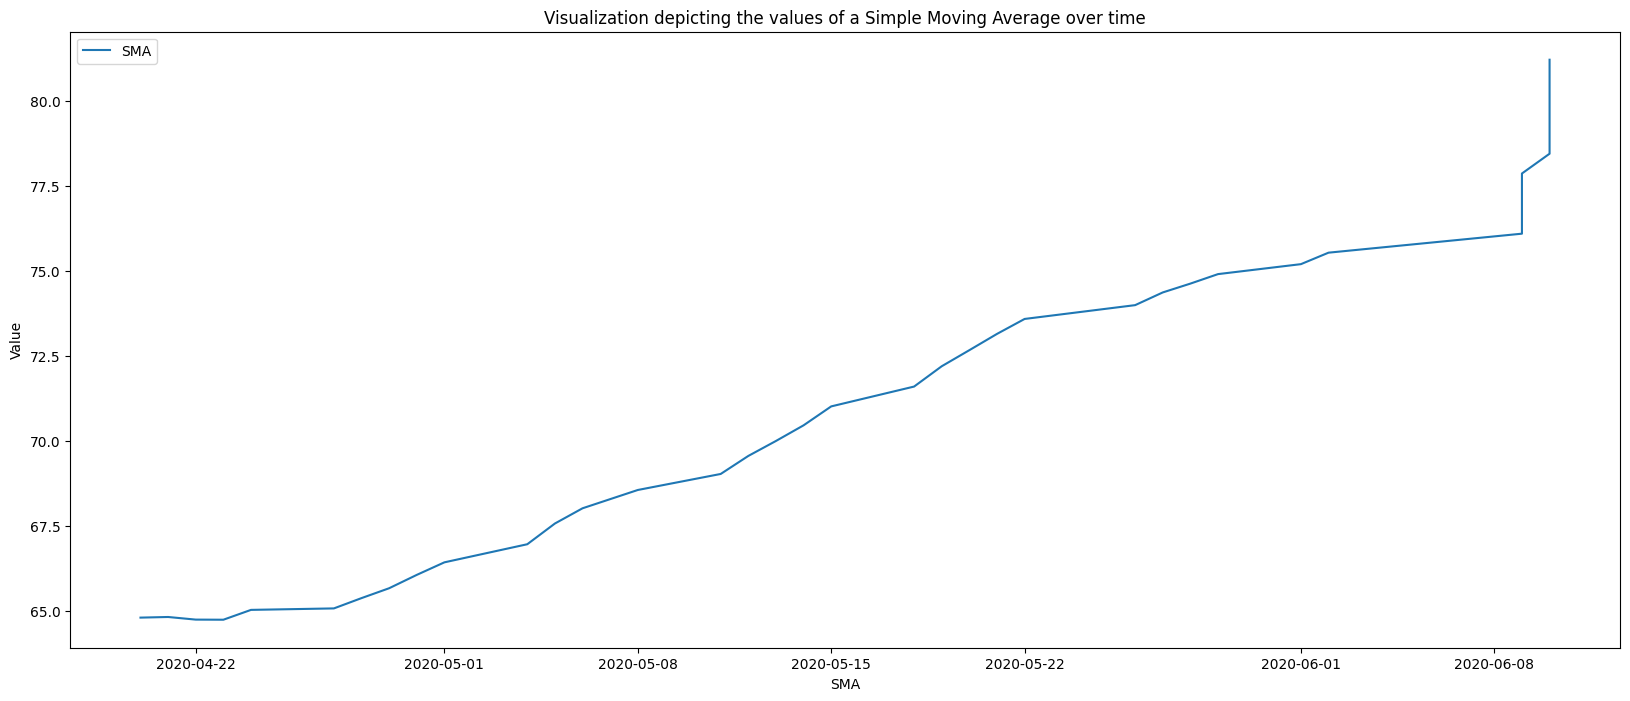

In [7]:
analyzer.plot_sma(merged_data)

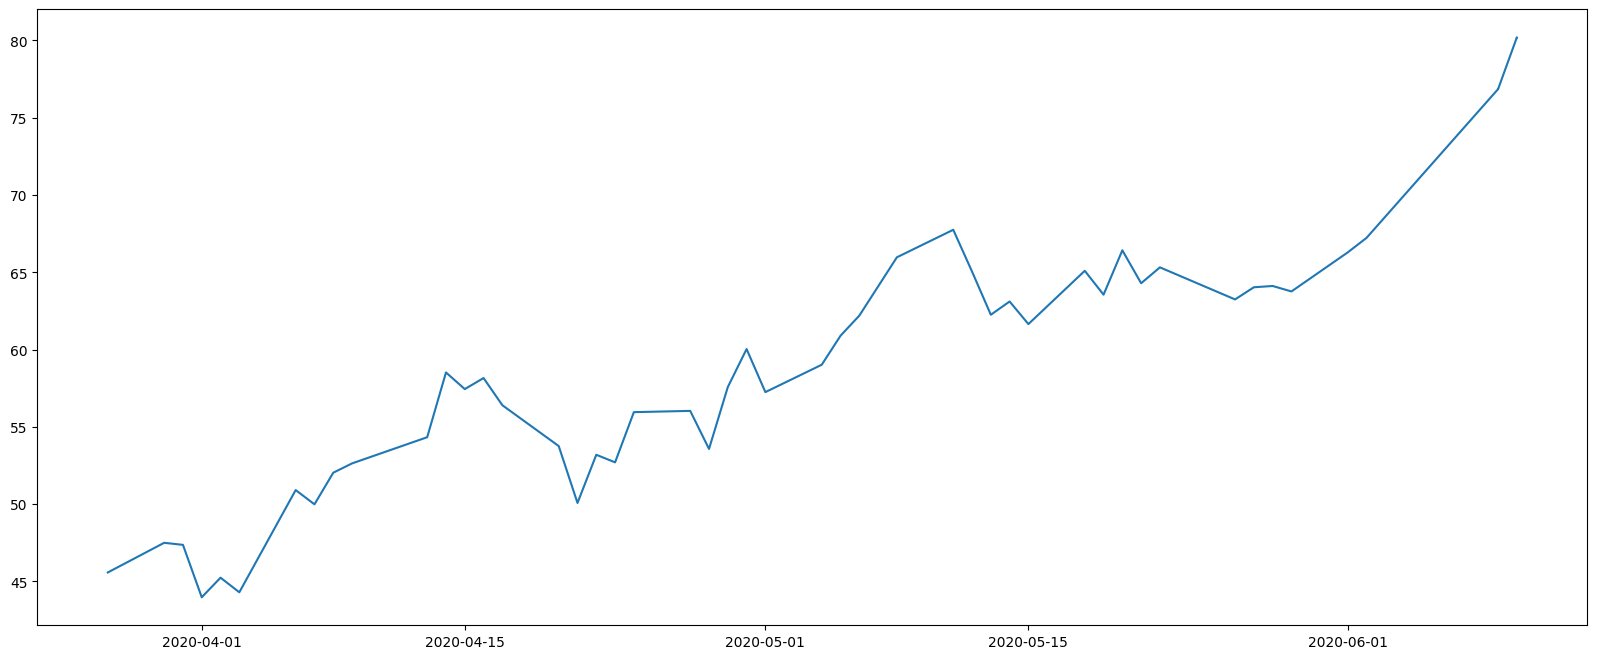

In [7]:
analyzer.plot_rsi(merged_data)

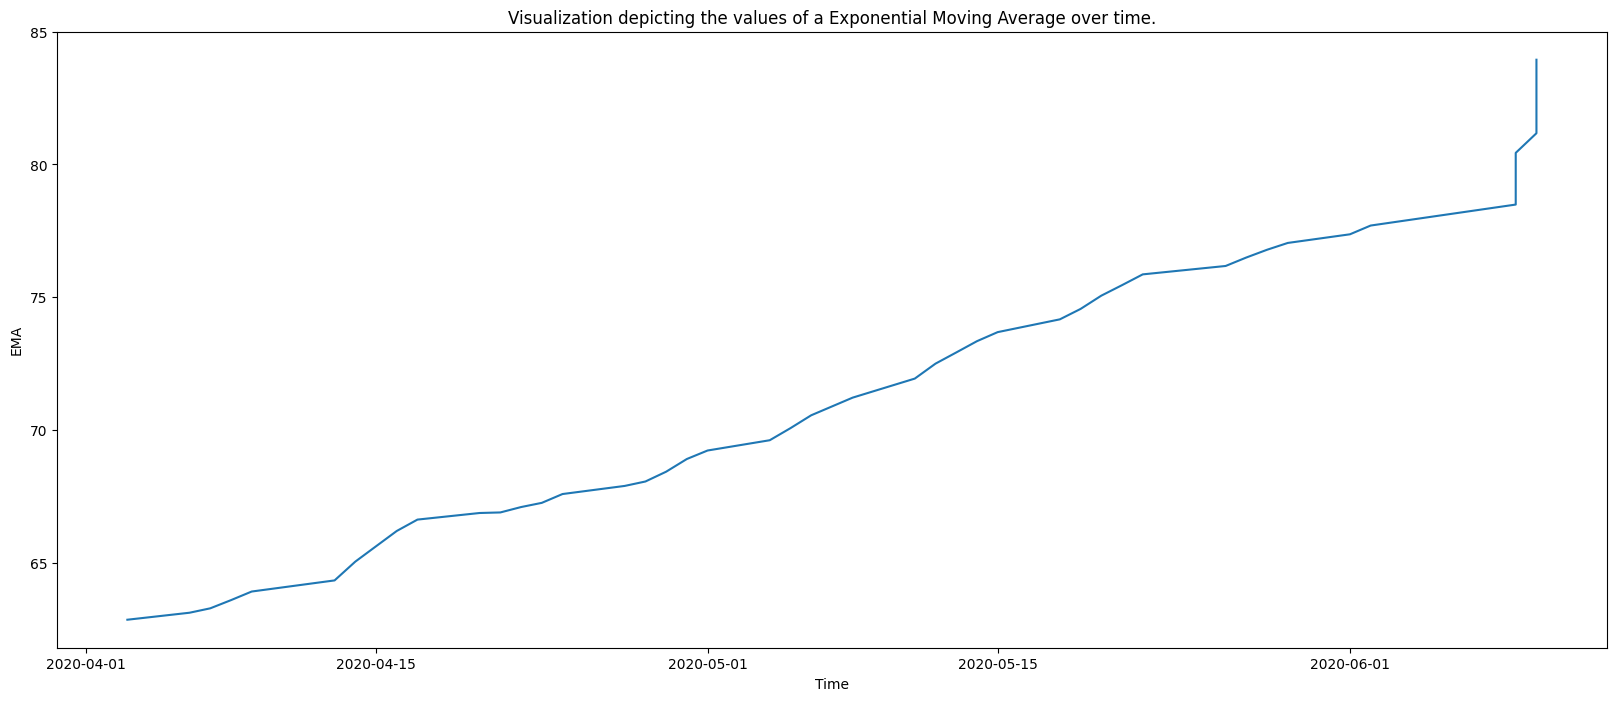

In [8]:
analyzer.plot_ema(merged_data)

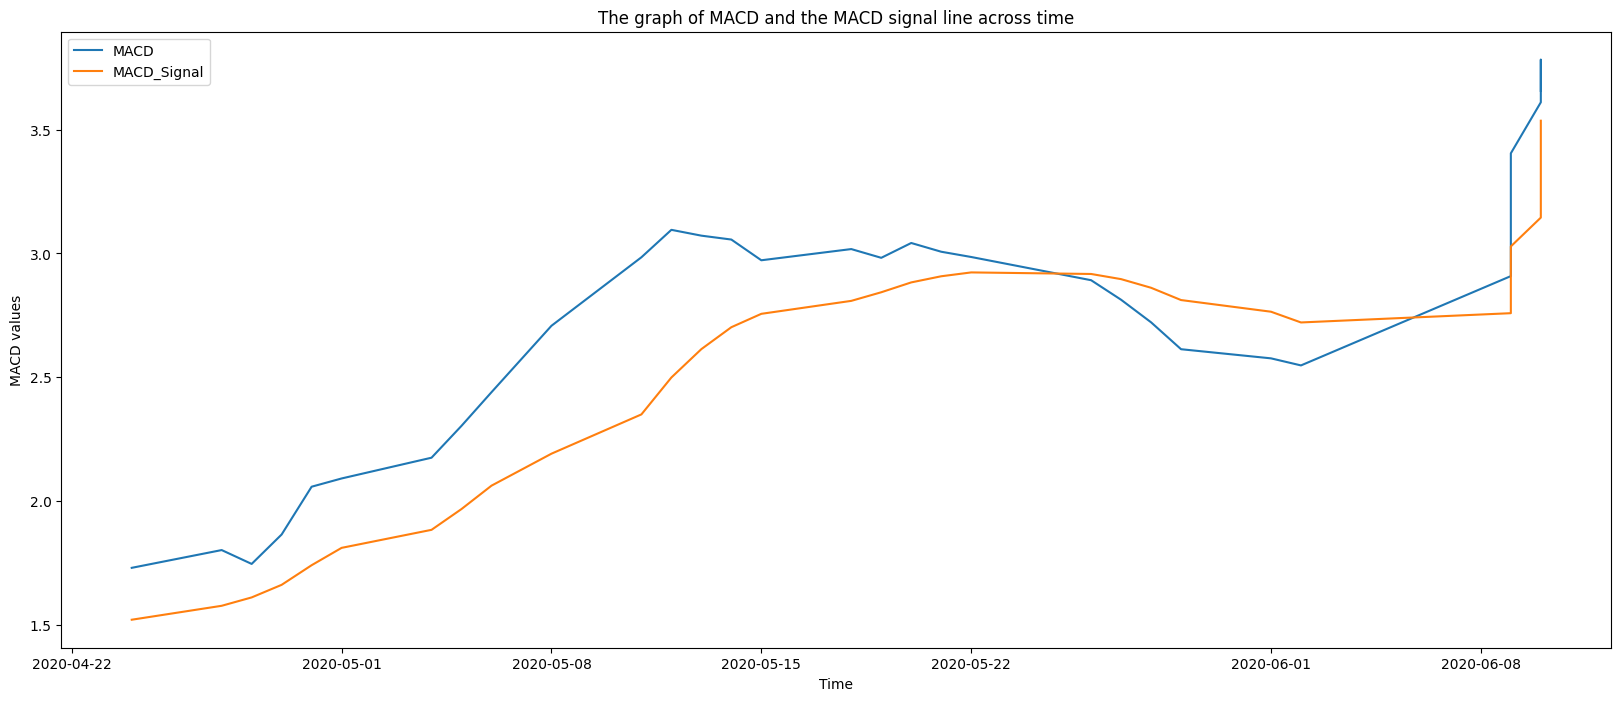

In [9]:
analyzer.plot_macd(merged_data)